In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

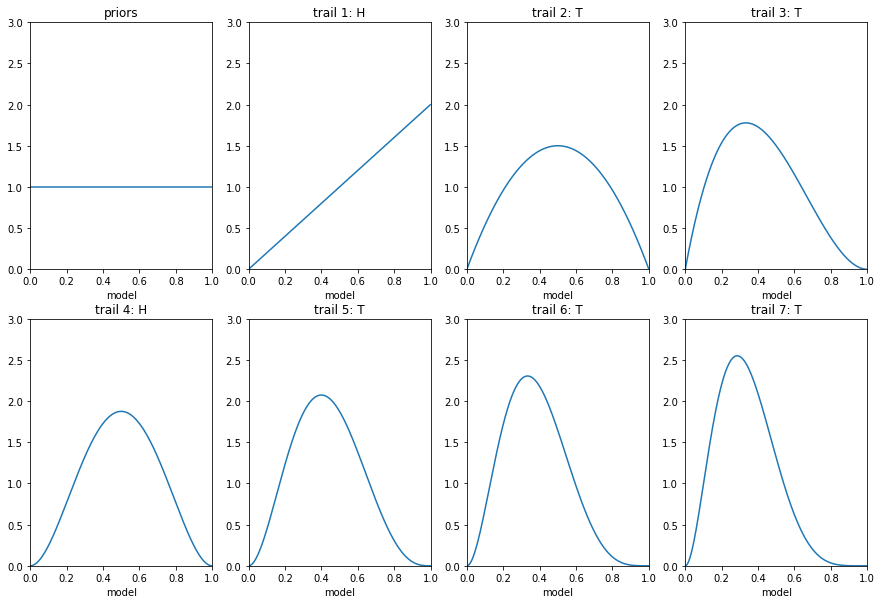

In [2]:
# Part 1

rows = 2
cols = 4
alpha = 1
beta = 1
xs = np.arange(0.0,1.0,0.001)
outcomes = [1,0,0,1,0,0,0]
plot_num = 100*rows + 10*cols + 1
plt.subplots(rows,cols,figsize=(15,10))
plt.subplot(plot_num)
plt.plot(xs,stats.beta.pdf(xs,alpha,beta))
plt.xlabel("model")
plt.title("priors")
plt.ylim([0,3])
plt.xlim([0,1])

for trail,outcome in enumerate(outcomes):
    
    alpha += outcome
    beta += 1-outcome
    plot_num += 1
    plt.subplot(plot_num)
    plt.plot(xs,stats.beta.pdf(xs,alpha,beta))
    plt.xlabel("model")
    plt.ylim([0,3])
    plt.xlim([0,1])
    
    if outcome:
        plt.title(str("trail " + str(trail + 1) + ": H"))
    else:
        plt.title(str("trail " + str(trail + 1) + ": T"))

plt.savefig('task1.png')
plt.show()

In [3]:
exampleA1 = [
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
];
exampleA2 = [
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleB1 = [
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
];
exampleB2 = [
    [1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleC1 = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0],
];
exampleC2 = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,0,0],
];

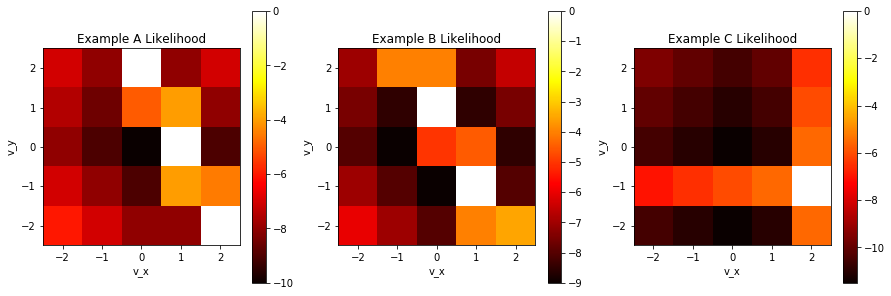

In [4]:
# Part 2, Task 1

def log_likelihood(I1,I2,vx,vy,sig2):
    
    num_rows = len(I1)
    num_cols = len(I1[0])
    log_like = 0.0
    
    for x in range(num_rows):
        if x + vx >= 0 and x + vx < num_rows:
            for y in range(num_cols):
                if y + vy >= 0 and y + vy < num_cols:
                    log_like += \
                    -((I1[x][y] - I2[x+vx][y+vy])**2)/(2.0*sig2)
                    
    return log_like

def make_likelihood(I1,I2,sig2):
    
    likelihoods = np.zeros((5,5))
    for vx in range(-2,3):
        for vy in range(-2,3):
            likelihoods[vx+2,vy+2] = log_likelihood(I1,I2,vx,vy,sig2)
    
    return likelihoods

def plot_image(im, title, vmin=None, vmax=None):
    
    plt.imshow(im, 
               cmap='hot', 
               extent=[-2.5,2.5,-2.5,2.5],
               vmin=vmin,
               vmax=vmax)
    plt.title(title)
    plt.xlabel('v_x')
    plt.ylabel('v_y')
    plt.colorbar()

plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
LA = make_likelihood(exampleA1, exampleA2, 1.0)
plot_image(LA, 'Example A Likelihood')

plt.subplot(132)
LB = make_likelihood(exampleB1, exampleB2, 1.0)
plot_image(LB, 'Example B Likelihood')

plt.subplot(133)
LC = make_likelihood(exampleC1, exampleC2, 1.0)
plot_image(LC, 'Example C Likelihood')

plt.savefig('task2_L.png')
plt.show()

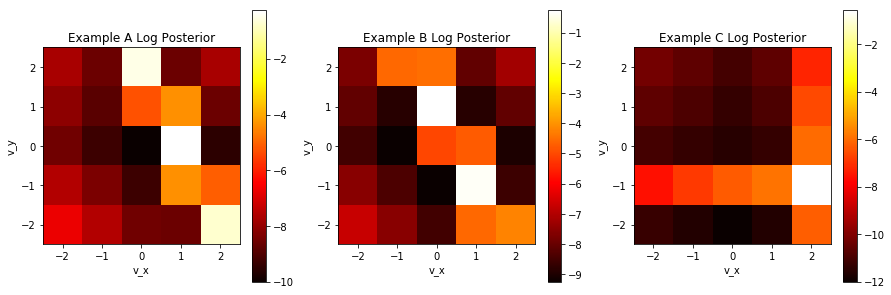

In [5]:
# Part 2, Task 2

def log_prior(vx,vy,sig_p2):
    
    return -np.linalg.norm([vx,vy])/(2*sig_p2)

def make_prior(sig_p2):
    
    priors = np.zeros((5,5))
    for vx in range(-2,3):
        for vy in range(-2,3):
            priors[vx+2,vy+2] = log_prior(vx, vy, sig_p2)
    
    return priors

prior = make_prior(2.0)

plt.subplots(1,3,figsize=(15,5))

plt.subplot(131)
PA = LA + prior
plot_image(PA, 'Example A Log Posterior')

plt.subplot(132)
PB = LB + prior
plot_image(PB, 'Example B Log Posterior')

plt.subplot(133)
PC = LC + prior
plot_image(PC, 'Example C Log Posterior')

plt.savefig('task2_Post.png')
plt.show()

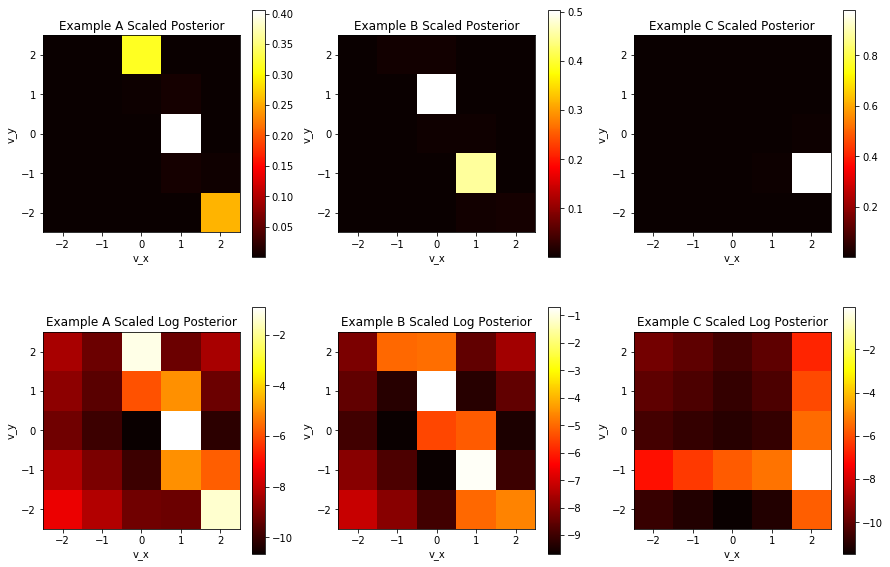

In [6]:
# Part 2, Task 3

PA_scaled = np.exp(PA)
PA_scaled = PA_scaled/np.sum(PA_scaled)
PA_scaled_log = np.log(PA_scaled)

PB_scaled = np.exp(PB)
PB_scaled = PB_scaled/np.sum(PB_scaled)
PB_scaled_log = np.log(PB_scaled)

PC_scaled = np.exp(PC)
PC_scaled = PC_scaled/np.sum(PC_scaled)
PC_scaled_log = np.log(PC_scaled)


plt.subplots(2,3,figsize=(15,10))

plt.subplot(231)
plot_image(PA_scaled, 'Example A Scaled Posterior')

plt.subplot(232)
plot_image(PB_scaled, 'Example B Scaled Posterior')

plt.subplot(233)
plot_image(PC_scaled, 'Example C Scaled Posterior')

plt.subplot(234)
plot_image(PA_scaled_log, 'Example A Scaled Log Posterior')

plt.subplot(235)
plot_image(PB_scaled_log, 'Example B Scaled Log Posterior')

plt.subplot(236)
plot_image(PC_scaled_log, 'Example C Scaled Log Posterior')

plt.savefig('task2_Post_Scaled.png')
plt.show()

In [7]:
# Part 2, Task 4
'''
MLE will have multiple best guesses, doesn't take into account the prior, 
while MAP takes into acount the prior prioritizes the slower moving ideas
'''

"\nMLE will have multiple best guesses, doesn't take into account the prior, \nwhile MAP takes into acount the prior prioritizes the slower moving ideas\n"

In [8]:
# Part 3

def find_posterior(data, prior, sig):

    like = {}
    posterior = {}
    
    for key in prior.keys():
        
        like[key] = 1.0
    
        for vx in data['vx']:
            like[key] *= stats.norm.pdf(key[0]-vx, 0.0, sig)
        for vy in data['vy']:
            like[key] *= stats.norm.pdf(key[1]-vy, 0.0, sig)
        
        posterior[key] = prior[key]*like[key]
    
    Z = sum(posterior.values())
    for key in keys:
        posterior[key] /= Z
        
    return posterior

keys = [(-1,0),(1,0),(0,-1),(0,1)]
data = {'vx': [0.75, 1.4], 'vy': [-0.6,-0.2]}

# Task 1
prior = {key:0.25 for key in keys}
print(find_posterior(data, prior, 1.0), '\n')

# Task 2
print(find_posterior(data, prior, 5.0), '\n')

# Task 3
prior = {(-1,0): 0.125, (1,0): 0.125, (0,1): 0.125, (0,-1): 0.625}
print(find_posterior(data, prior, 1.0), '\n')

# Task 4
print(find_posterior(data, prior, 5.0), '\n')

{(-1, 0): 0.010239274126642186, (1, 0): 0.75463239076713817, (0, -1): 0.19563109767430514, (0, 1): 0.039497237431914536} 

{(-1, 0): 0.22891642279657048, (1, 0): 0.2718789610141093, (0, -1): 0.25758685674711773, (0, 1): 0.2416177594422024} 

{(-1, 0): 0.0057442547098259756, (1, 0): 0.42335038707210598, (0, 1): 0.022158034772509057, (0, -1): 0.54874732344555899} 

{(-1, 0): 0.11274741443444122, (1, 0): 0.13390760487596745, (0, 1): 0.11900315986835017, (0, -1): 0.63434182082124124} 

